In [3]:
graphlab.get_dependencies()


By running this function, you agree to the following licenses.

* libstdc++: https://gcc.gnu.org/onlinedocs/libstdc++/manual/license.html
* xz: http://git.tukaani.org/?p=xz.git;a=blob;f=COPYING
    
Extracting xz.
Extracting gcc-libs.
Copying gcc-libs into the installation directory.


#Fire up graphlab create

In [2]:
import graphlab

AttributeError: 'module' object has no attribute 'connect'

#Load some house value vs. crime rate data

Dataset is from Philadelphia, PA and includes average house sales price in a number of neighborhoods.  The attributes of each neighborhood we have include the crime rate ('CrimeRate'), miles from Center City ('MilesPhila'), town name ('Name'), and county name ('County').

In [ ]:
sales = graphlab.SFrame.read_csv('experiment.csv/')

In [5]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0


#Exploring the data 

The house price in a town is correlated with the crime rate of that town. Low crime towns tend to be associated with higher house prices and vice versa.

In [4]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="sqft_living", y="price")

#Fit the regression model using crime as the feature

In [5]:
train_data,test_data = sales.random_split(.8,seed=0)

In [24]:
def s_l_r(input_feature, output):
    m_x = train_data[input_feature].sum()/len(train_data)
    m_y = train_data[output].sum()/len(train_data)
    x_y = (train_data[input_feature] * train_data[output])
    m_x_y = sum(x_y) / len(train_data)
    x_x = (train_data[input_feature] * train_data[input_feature]) 
    m_x_x = sum(x_x) / len(train_data)
    num = m_x_y - (m_x*m_y)
    den = m_x_x - (m_x**2)
    slope = num/den
    intercept = m_y - (slope * m_x)
    return(slope,intercept)
    

In [25]:
model = s_l_r('sqft_living','price')

In [26]:
model

(281.93696028190055, -47062.24945262098)

#Let's see what our fit looks like

In [39]:
y = (model[0] * 2650) + model[1]

In [40]:
y

700070.6952944155

In [41]:
round(y,2)

700070.7

In [31]:
train_data['predicted_price'] = (model[0] * train_data['sqft_living']) + model[1]

In [33]:
x = (train_data['price'] - train_data['predicted_price'])**2

In [34]:
sum(x)

1201918362448803.2

In [37]:
round((800000 - model[1])/model[0],2)

3004.44

In [47]:
test_data.show(view="Scatter Plot", x="sqft_living", y="price")

In [7]:
len(test_data)

4229

In [10]:
test_data_filter = test_data[test_data['bedrooms'] != 33]

In [11]:
len(test_data_filter)

4228

In [12]:
test_data_filter.show(view="Scatter Plot", x="bedrooms", y="sqft_living")

In [ ]:
test_data.show(view="Scatter Plot", x="sqft_living", y="price")

Matplotlib is a Python plotting library that is also useful for plotting.  You can install it with:

'pip install matplotlib'

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

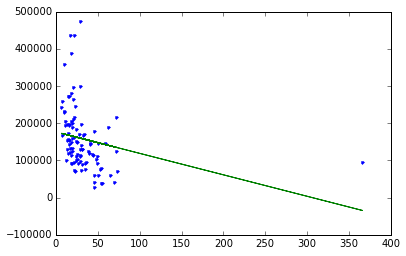

In [25]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
        sales['CrimeRate'],crime_model.predict(sales),'-')

Above: blue dots are original data, green line is the fit from the simple regression.

# Remove Center City and redo the analysis

Center City is the one observation with an extremely high crime rate, yet house prices are not very low.  This point does not follow the trend of the rest of the data very well.  A question is how much including Center City is influencing our fit on the other datapoints.  Let's remove this datapoint and see what happens.

In [26]:
sales_noCC = sales[sales['MilesPhila'] != 0.0] 

In [27]:
sales_noCC.show(view="Scatter Plot", x="CrimeRate", y="HousePrice")

### Refit our simple regression model on this modified dataset:

In [29]:
crime_model_noCC = graphlab.linear_regression.create(sales_noCC, target='HousePrice', features=['CrimeRate'],validation_set=None, verbose=False)

### Look at the fit:

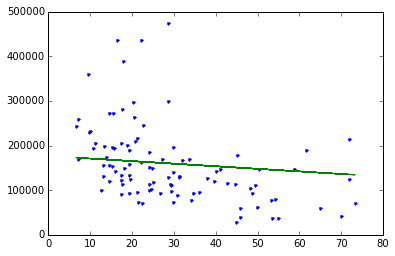

In [30]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
        sales_noCC['CrimeRate'],crime_model.predict(sales_noCC),'-')

# Compare coefficients for full-data fit versus no-Center-City fit

Visually, the fit seems different, but let's quantify this by examining the estimated coefficients of our original fit and that of the modified dataset with Center City removed.

In [31]:
crime_model.get('coefficients')

name,index,value
(intercept),None,176626.046881
CrimeRate,None,-576.804949058


In [32]:
crime_model_noCC.get('coefficients')

name,index,value
(intercept),None,225204.604303
CrimeRate,None,-2287.69717443


Above: We see that for the "no Center City" version, per unit increase in crime, the predicted decrease in house prices is 2,287.  In contrast, for the original dataset, the drop is only 576 per unit increase in crime.  This is significantly different!

###High leverage points: 
Center City is said to be a "high leverage" point because it is at an extreme x value where there are not other observations.  As a result, recalling the closed-form solution for simple regression, this point has the *potential* to dramatically change the least squares line since the center of x mass is heavily influenced by this one point and the least squares line will try to fit close to that outlying (in x) point.  If a high leverage point follows the trend of the other data, this might not have much effect.  On the other hand, if this point somehow differs, it can be strongly influential in the resulting fit.

###Influential observations:  
An influential observation is one where the removal of the point significantly changes the fit.  As discussed above, high leverage points are good candidates for being influential observations, but need not be.  Other observations that are *not* leverage points can also be influential observations (e.g., strongly outlying in y even if x is a typical value).

# Remove high-value outlier neighborhoods and redo analysis

Based on the discussion above, a question is whether the outlying high-value towns are strongly influencing the fit.  Let's remove them and see what happens.

In [33]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000] 
crime_model_nohighend = graphlab.linear_regression.create(sales_nohighend, target='HousePrice', features=['CrimeRate'],validation_set=None, verbose=False)

### Do the coefficients change much?

In [34]:
crime_model_noCC.get('coefficients')

name,index,value
(intercept),None,225204.604303
CrimeRate,None,-2287.69717443


In [35]:
crime_model_nohighend.get('coefficients')

name,index,value
(intercept),None,199073.589615
CrimeRate,None,-1837.71280989


Above: We see that removing the outlying high-value neighborhoods has *some* effect on the fit, but not nearly as much as our high-leverage Center City datapoint.